In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [2]:
ls

CONTRIBUTING.md    Round 1.ipynb      Round 4.ipynb      data/
LICENSE.md         Round 2.....ipynb  Round 5.ipynb      halfway-there.gif
README.md          Round 3.....ipynb  Round 6.ipynb


In [3]:
data = pd.read_csv("data/kc_house_data.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data = data.reset_index()

In [7]:
columns = data.columns.to_list()
columns

['index',
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [8]:
data.columns = data.columns.str.replace(' ', '')

In [9]:
data = data.drop(columns=['index', 'id', 'lat','long'])

In [10]:
cols = list(data.columns)
cols = [cols[1]] + cols[:1] + cols[2:]
data = data[cols]

In [11]:
data.shape

(21597, 18)

In [12]:
data.dtypes

price            float64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Need to check on possibly modification of data types for the following columns:

1.) sqft_basement

2.) date

In [13]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [14]:
errors = []
for idx in data.index:
    try: 
        float(data.sqft_basement[idx])
    except:
        errors.append(idx)

In [15]:
data.iloc[errors].sqft_basement.value_counts()

?    454
Name: sqft_basement, dtype: int64

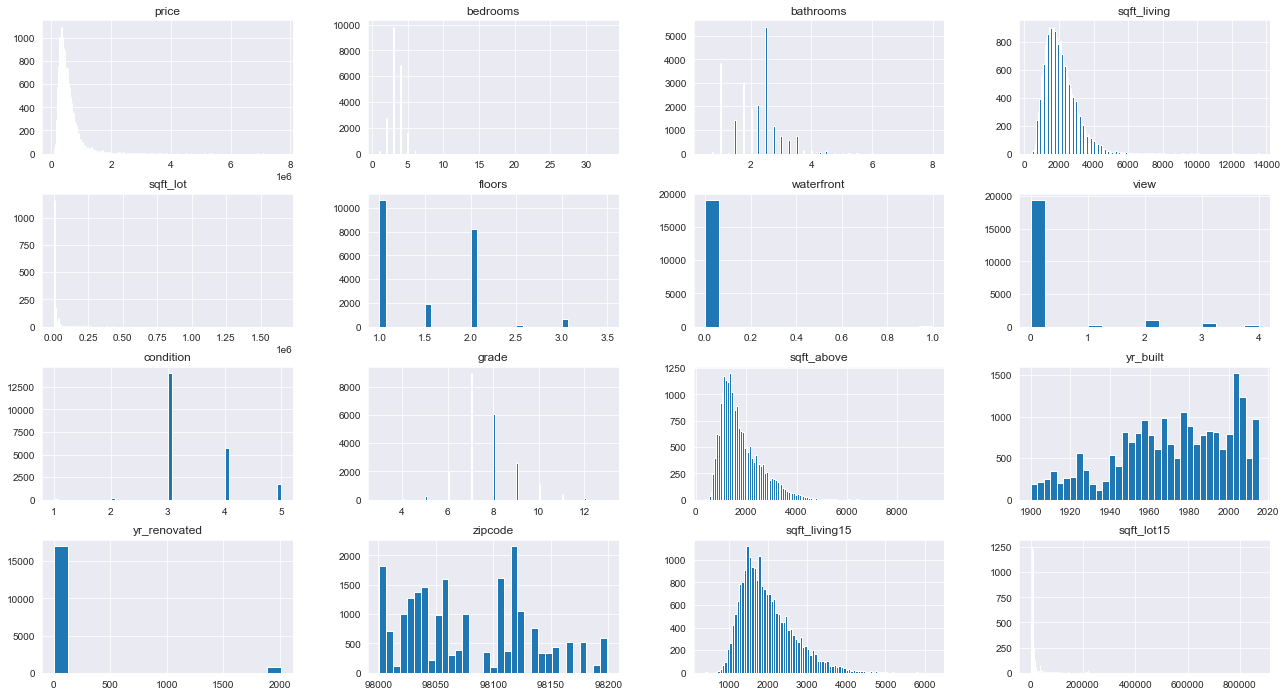

In [16]:
data.hist(figsize  = [22, 12], bins = 'auto');

#### I can replace nan's or missing data with their mean, for the following columns: price, sqft_living, sqft_lot, sqft_above, sqft_living15 and sqft_lot 15

In [17]:
data['sqft_basement'] = pd.to_numeric(data.sqft_basement, errors="coerce")
data['yr_renovated'] = pd.to_numeric(data.yr_renovated, errors="coerce")

In [18]:
column_means = data.mean()
data = data.fillna(column_means)

In [19]:
data['price'] = data['price'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
data['waterfront'] = data['waterfront'].astype(int)
data['view'] = data['view'].astype(int)

In [20]:
data['sqft_basement'] = data['sqft_basement'].astype(int)
data['yr_renovated'] = data['yr_renovated'].astype(int)

In [21]:
data.dtypes

price             int64
date             object
bedrooms          int64
bathrooms         int64
sqft_living       int64
sqft_lot          int64
floors            int64
waterfront        int64
view              int64
condition         int64
grade             int64
sqft_above        int64
sqft_basement     int64
yr_built          int64
yr_renovated      int64
zipcode           int64
sqft_living15     int64
sqft_lot15        int64
dtype: object

In [22]:
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900,10/13/2014,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000,12/9/2014,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000,2/25/2015,2,1,770,10000,1,0,0,3,6,770,0,1933,83,98028,2720,8062
3,604000,12/9/2014,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000,2/18/2015,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [23]:
#data.to_csv('Semi-Editted', index = False)

# Feature Engineering Time

In [24]:
data['age'] = 2021 - data.yr_built
data = data.drop(columns=['yr_built'], axis=1)

In [25]:
#Convert date column to 2 separate columns for month and year
date = data['date'].str.split('/', expand=True)
data['month_sold'] = date[0].astype('int64')
data['year_sold'] = date[2].astype('int64')
#Drop original date column
data.drop(columns=['date'], axis=1, inplace=True)

In [26]:
# Let's change yr_renovated to a binary column? Since it's not manadatory to have renovated your home

data.yr_renovated.fillna(0.0, inplace=True)
#Create renovated column
data['renovated'] = data.year_sold - data.yr_renovated
#Replace any values less than 10 with 1, and any values over 10 with 0renovated = df.renovated.values
age = data.age.values
values = np.where(data.renovated <= 10, 1, 0)
data['renovated'] = np.where(age <= 5, 1, values)
#Drop yr_renovated column
data.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [27]:
# sqft_livingsquare  -  footage of the home
# sqft_lotsquare-  footage of the lot

# sqft_above - square footage of house apart from basement
# sqft_basement - square footage of the basement

# sqft_above + sqft_basement = sqft_livingsquare
data['yard_space'] = data.sqft_lot - data.sqft_living

In [28]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,month_sold,year_sold,renovated,yard_space
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,1340,5650,66,10,2014,0,4470
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,1690,7639,70,12,2014,0,4672
2,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,2720,8062,88,2,2015,0,9230
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,1360,5000,56,12,2014,0,3040
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,1800,7503,34,2,2015,0,6400


# Correlation

In [29]:
data_corr = data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age,month_sold,year_sold,renovated,yard_space
price,1.000000,0.308787,0.510631,0.701917,0.089876,0.237264,0.264306,0.393497,0.036056,0.667951,0.605368,0.322193,-0.053402,0.585241,0.082845,-0.053953,-0.009928,0.003727,0.073734,0.074584
bedrooms,0.308787,1.000000,0.465995,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,0.479386,0.299036,-0.154092,0.393406,0.030690,-0.155670,-0.001046,-0.009949,0.024346,0.019723
bathrooms,0.510631,0.465995,1.000000,0.698591,0.086029,0.486404,0.059587,0.175111,-0.127328,0.607156,0.640895,0.246948,-0.160478,0.510950,0.082039,-0.434536,0.004087,-0.021699,0.053010,0.070797
sqft_living,0.701917,0.578212,0.698591,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,0.876448,0.430192,-0.199802,0.756402,0.184342,-0.318152,0.012112,-0.029014,0.030274,0.151831
sqft_lot,0.089876,0.032471,0.086029,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015293,-0.129586,0.144763,0.718204,-0.052946,-0.002591,0.005628,-0.013557,0.999760
floors,0.237264,0.158065,0.486404,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,0.518037,-0.232392,-0.097146,0.296797,-0.012766,-0.578549,0.013083,-0.019523,-0.012706,-0.016497
waterfront,0.264306,-0.002127,0.059587,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,0.071778,0.083778,0.028923,0.083823,0.030658,0.024487,0.008199,-0.005018,0.000432,0.019208
view,0.393497,0.078354,0.175111,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,0.166017,0.272311,0.085059,0.278928,0.073083,0.054452,-0.005161,0.001239,0.023967,0.069058
condition,0.036056,0.026496,-0.127328,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.169153,0.002888,-0.093072,-0.003126,0.361592,0.022388,-0.045898,-0.065082,-0.007539
grade,0.667951,0.356563,0.607156,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,0.756073,0.166398,-0.185771,0.713867,0.120981,-0.447865,0.008989,-0.030635,0.018676,0.098174


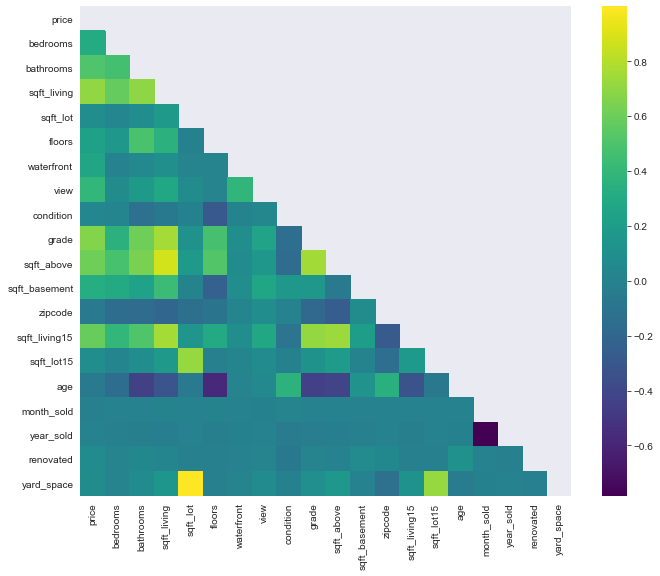

In [30]:
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(data_corr, mask=mask, ax=ax1, cmap="viridis");

# Further Data Exploration of Selected Independent variable

In [31]:
model1_cols = ['price', 'sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold']
model1 = data[model1_cols]

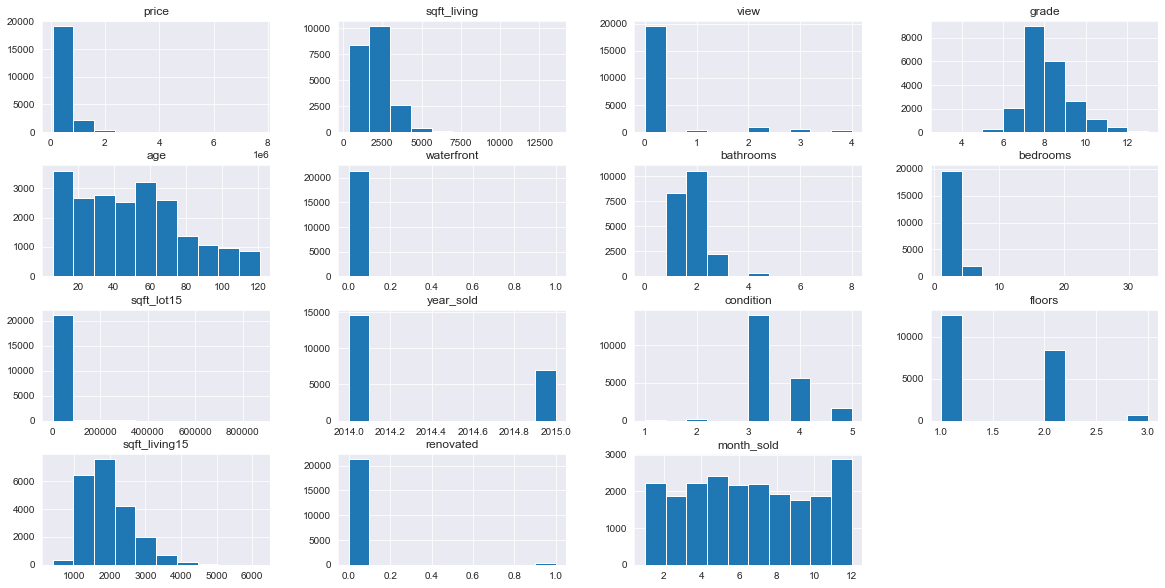

In [32]:
model1.hist(figsize  = [20, 10]); 

In [33]:
def bootstrap(df,column,target,sample_size=300):
    unique = df[column].unique()
    for val in unique:
        samples = []
        frame = df[df[column] == val]
        for i in range(sample_size):
            sample = np.random.choice(frame[target], size = frame.shape[0], replace = True)
            samples.append(sample.mean())
        plt.hist(samples, label = val, alpha =.7)
    plt.legend();

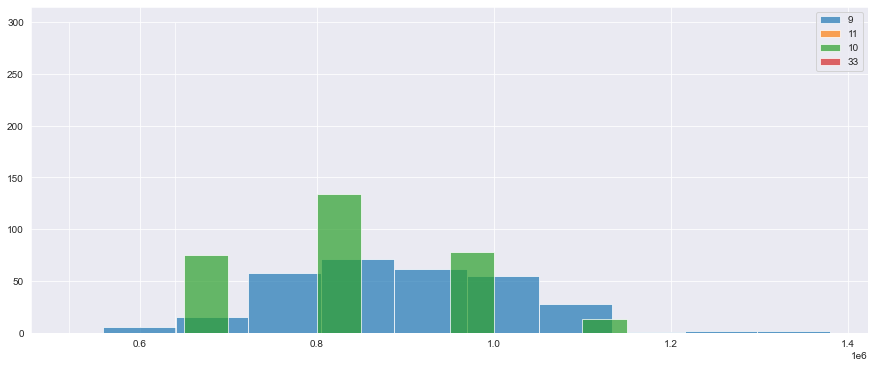

In [34]:
plt.figure(figsize = (15,6))
frame = data[data.bedrooms>8]
bootstrap(frame,'bedrooms','price')

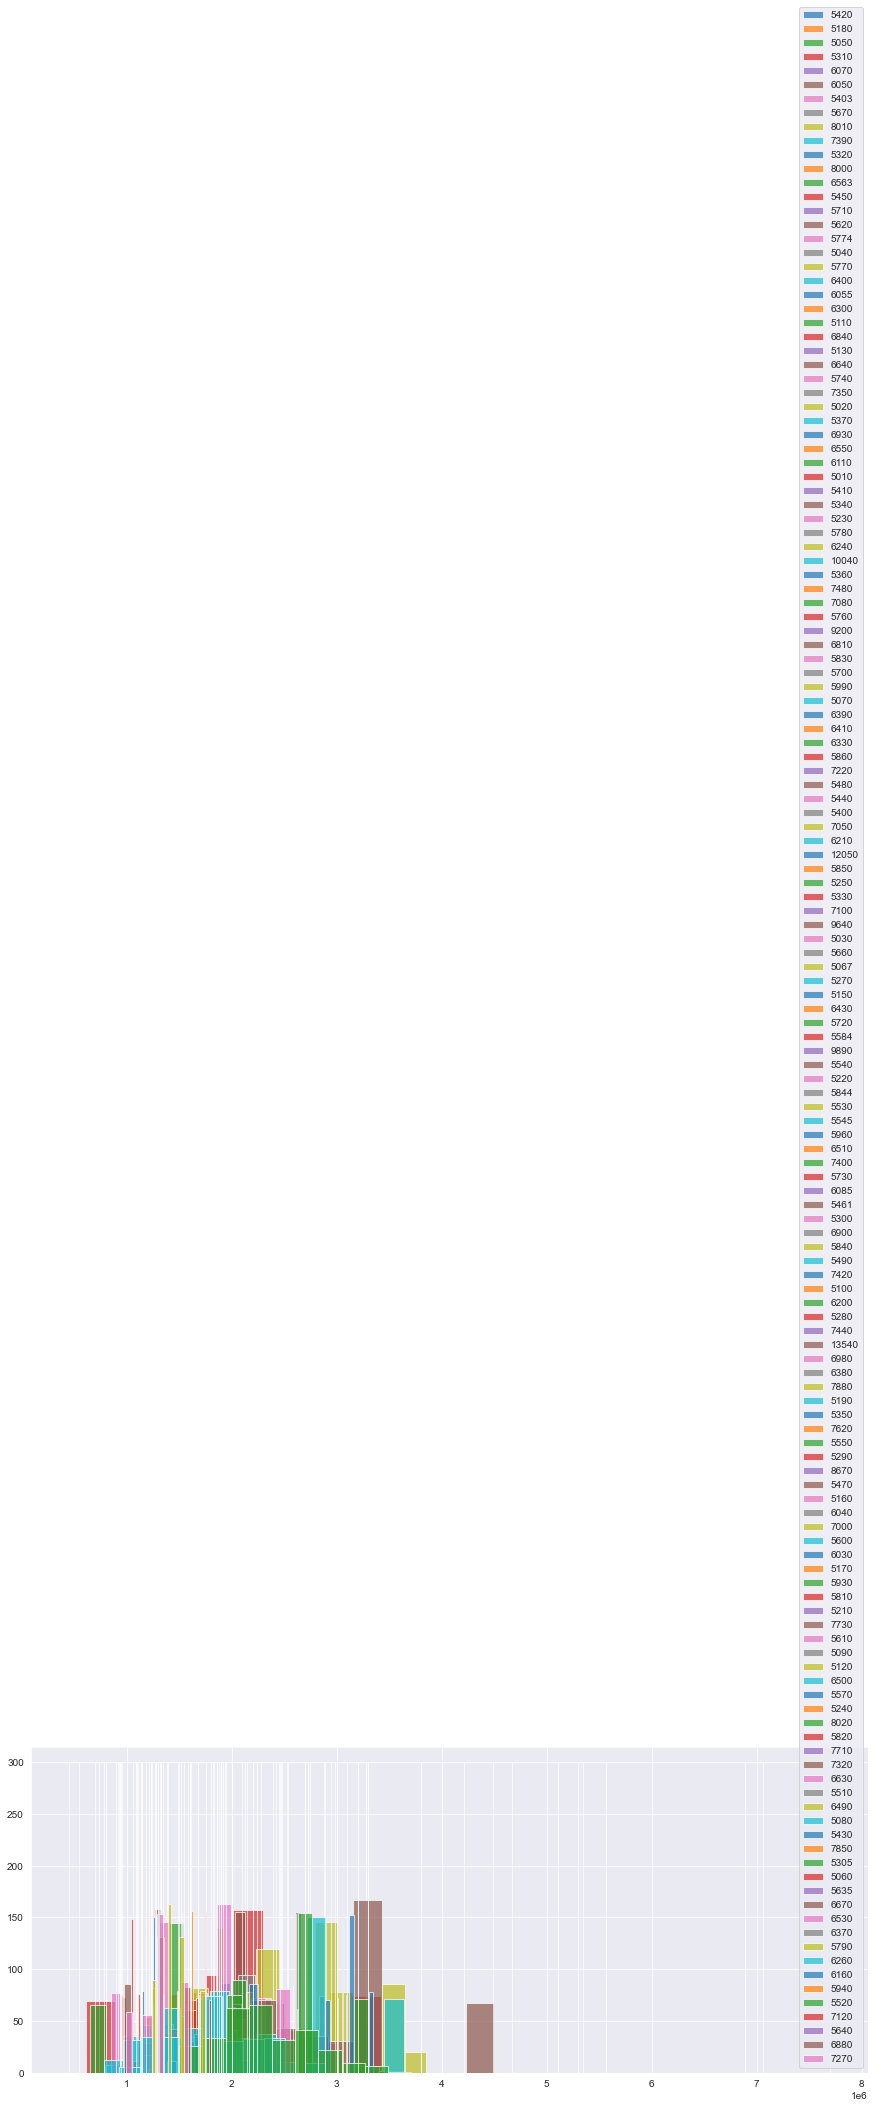

In [35]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_living>5000]
bootstrap(frame,'sqft_living','price')

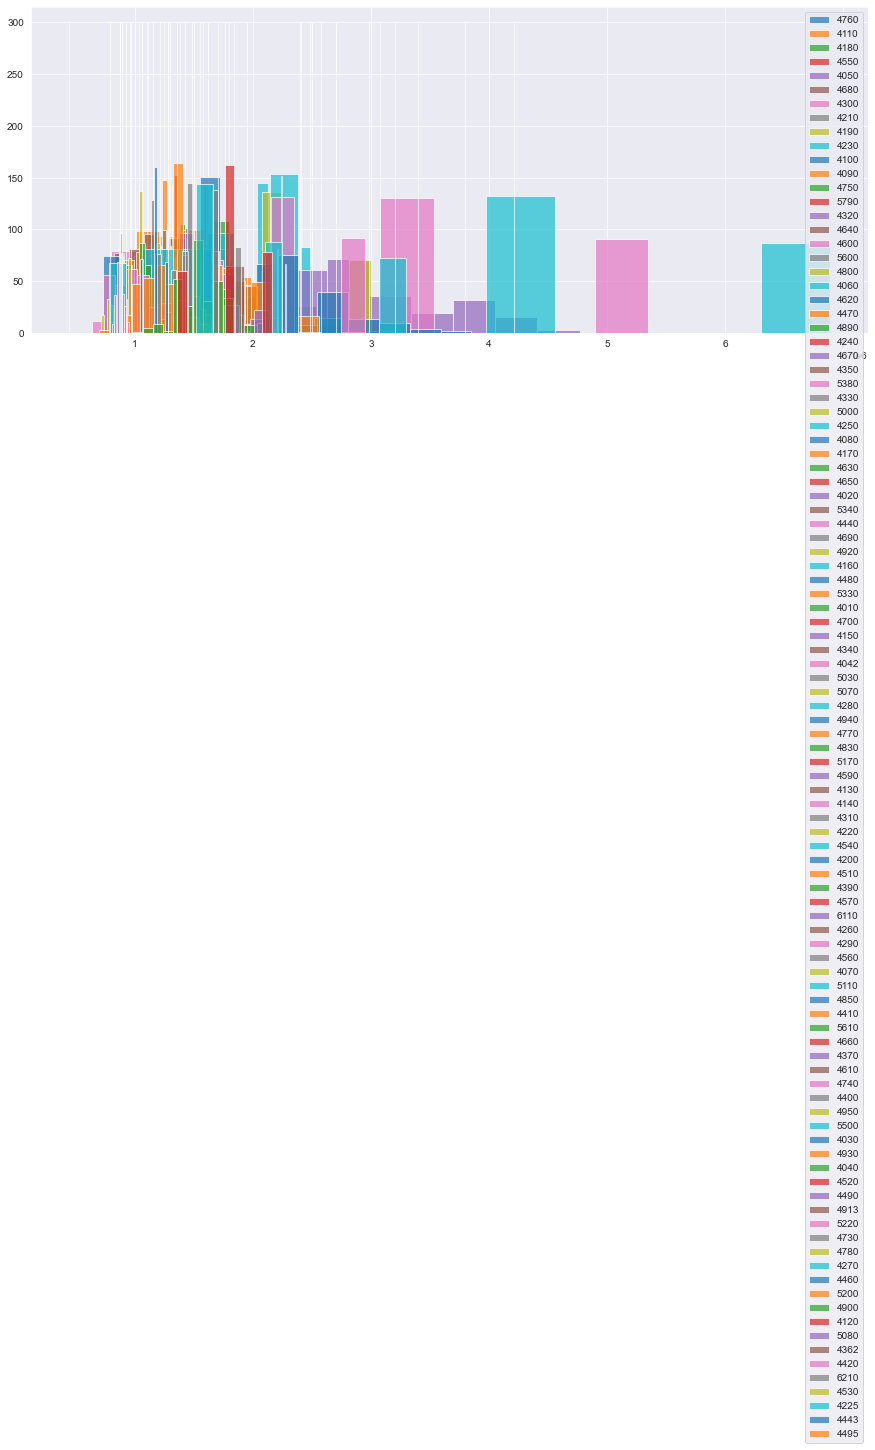

In [36]:
plt.figure(figsize = (15,6))
frame = data[data.sqft_living15>4000]
bootstrap(frame,'sqft_living15','price')

In [37]:
model1 = model1[model1['bedrooms'] <= 10]
model1 = model1[model1['sqft_living'] <= 5000]
model1 = model1[model1['sqft_living15'] <= 4000]

In [38]:
# Removing Outliers
model1 = model1[model1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

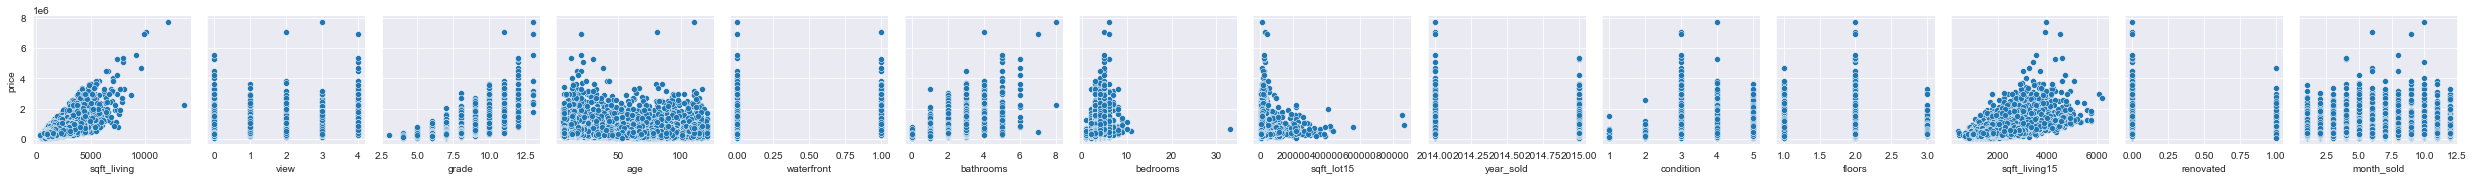

In [39]:
sns.pairplot(data=data,
                y_vars=['price'],
                x_vars=['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','renovated', 'month_sold'])

# Linear Regression Model

In [40]:
fsm_df1 = model1.copy()
fsm_df1.dropna(inplace=True)

In [41]:
fsm1 = ols(formula ="price ~ sqft_living + view + grade + age + waterfront + bathrooms + bedrooms + sqft_lot15 + year_sold + condition + floors + sqft_living15 + month_sold", data=fsm_df1)
fsm_results1 = fsm1.fit()

In [42]:
fsm_results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2039.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:            -2.5548e+05
No. Observations:               19214   AIC:                         5.110e+05
Df Residuals:                   19201   BIC:                         5.111e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.498e+07   7.23e+06     -4.841      0.000   -4.91e+07   -2.08e+07
sqft_living      87.1143      2.875     30.304      0.000      81.480      92.749
view           2.911e+04   2626.145     11.085      0.000     2.4e+04    3.43e+04
grade          1.033e+05   1697.390     60.863      0.000       1e+05    1.07e+05
age            2959.8043     49.811     59.421      0.000    2862.171    3057.438
waterfront        0.0003   7.02e-05      4.841      0.000       0.000       0.000
bathrooms      2.925e+04   2364.776     12.369      0.000    2.46e+04    3.39e+04
bedrooms      -1.691e+04   1590.842    -10.628      0.000      -2e+04   -1.38e+04
sqft_lot15       -1.3253      0.119    -11.137      0.000      -1.559      -1.092
year_sold      1.695e+04   3585.099      4.729      0.000    9925.560     2.4e+04
condition      2.296e+04   1764.318     13.014      0.000    1.95e+04    2.64e+04
floors         3.929e+04   2604.111     15.088      0.000    3.42e+04    4.44e+04
sqft_living15    50.0279      2.844     17.588      0.000      44.453      55.603
month_sold     -221.6471    537.070     -0.413      0.680   -1274.350     831.056
==============================================================================
Omnibus:                     2207.302   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4905.984
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       5.038   Cond. No.                     8.98e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#  Model 1, Evaluation:

We are explaining about roughly 56% of the variance in home price, with our 14 features so far and it's statistically significant.

According to our model:

 - For each additional footage of the home, we expect the home price to increase 171
 
 - For each additional bathroom, we expect the home price to increase by 9600
 
 - ...
 

## Linearity Model 1 Assumption 

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not.

Thus returning a p-value above .05 means that the current model does meet the linearity assumption.

In [43]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results1)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0253939353301809
Rainbow p-value: 0.10963227975977746


## Normality Model 1 Assumption

Linear regression assumes that the residuals are normally distributed. The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. 

Thus returning a low p-value means that the current model violates the normality assumption.

In [44]:
# Jarque-Bera (JB): 4905.984
# Prob(JB): 0.00

## Homoscadasticity for Model 1:

Linear regression assumes that the variance of the dependent variable is homogeneous across different value of the independent variable(s). 

We can visualize this by looking at the predicted life expectancy vs. the residuals.

The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. 

Thus returning a low p-value means that the current model violates the homoscedasticity assumption.

In [45]:
y = fsm_df1["price"]
y_hat = fsm_results1.predict()

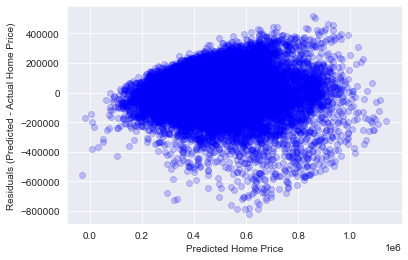

In [46]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Home Price",
        ylabel="Residuals (Predicted - Actual Home Price)")
ax2.scatter(x = y_hat, y = y_hat-y, color = "blue", alpha=0.2);

In [47]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df1[['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','month_sold']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


## Independence for Model 1:

You might have noticed in the regression output that there was a warning about the condition number being high. 

The condition number is a measure of stability of the matrix used for computing the regression and a number above 30 can indicate strong multicollinearity. 

Our output was 8.98e+20

In [48]:
rows = fsm_df1[['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','month_sold']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(13)]
vif_df["feature"] = ['sqft_living', 'view', 'grade', 'age', 'waterfront', 'bathrooms', 'bedrooms', 'sqft_lot15', 'year_sold', 'condition', 'floors', 'sqft_living15','month_sold']

vif_df

/Users/sammy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,feature
0,32.503797,sqft_living
1,1.104186,view
2,152.420122,grade
3,7.740114,age
4,NaN,waterfront
5,16.269740,bathrooms
6,27.408344,bedrooms
7,2.269565,sqft_lot15
8,167.335271,year_sold
9,34.826428,condition
